# Data Wrangling on Titanic Dataset:

## What is Data Wrangling:
### Data wrangling is the process of 'cleaning', 'transforming', and 'organizing' data so that it can be used for 'analysis' and 'visualization'. It is an important step in the data analysis process because raw data is often incomplete, inconsistent, and in an unstructured format, which can make it difficult to work with. Data wrangling helps to make the data more 'consistent',' accurate', and 'useful' for analysis and decision making.



# Importing libraries:

In [47]:
# libraries
import pandas as pd 
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Loading the Dataset:

In [3]:
df=sns.load_dataset("titanic")

# 1. Assessing the Data:

In [4]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()/ len(df)* 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# 2. Cleaning the Data:
## 2.1. Dealing with missing values:

In [8]:
df.drop(columns=["deck"], inplace=True)

In [9]:
df['age'] = df['age'].fillna(value=df['age'].mean())

In [10]:
df['embarked'] = df['embarked'].fillna(value=df['embarked'].mode()[0])

In [11]:
df['embark_town'] = df['embark_town'].fillna(value=df['embark_town'].mode()[0])

In [12]:
df.isnull().sum()/ len(df)* 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

## 2.2. Outliers removal


### Visualization method

<Axes: xlabel='sex', ylabel='age'>

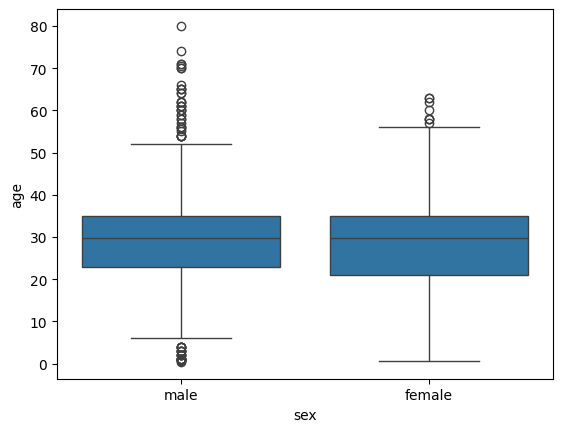

In [13]:
sns.boxplot(data=df, y='age', x='sex')

In [14]:
# Removing outliers through IQR method of age column
Q1= df['age'].quantile(0.25)
Q3= df['age'].quantile(0.75)
IQR=Q3-Q1
IQR
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]


In [15]:
df.shape

(825, 14)

In [16]:
# Removing outliers through IQR method of fare column
Q1= df['fare'].quantile(0.25)
Q3= df['fare'].quantile(0.75)
IQR=Q3-Q1
IQR
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]


In [17]:
df.shape

(718, 14)

<Axes: xlabel='fare', ylabel='Count'>

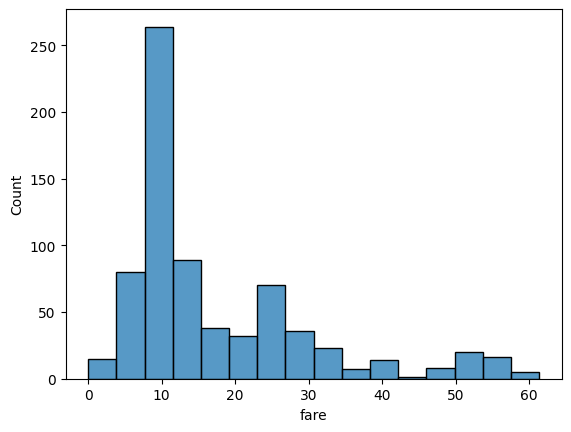

In [18]:
sns.histplot(df['fare'])

In [20]:
from scipy import stats

## 2.3. Finding and dropping the duplicates:

In [21]:
df.duplicated().sum()

np.int64(103)

In [22]:
df_duplicates = df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [23]:
df_duplicates.shape

(103, 14)

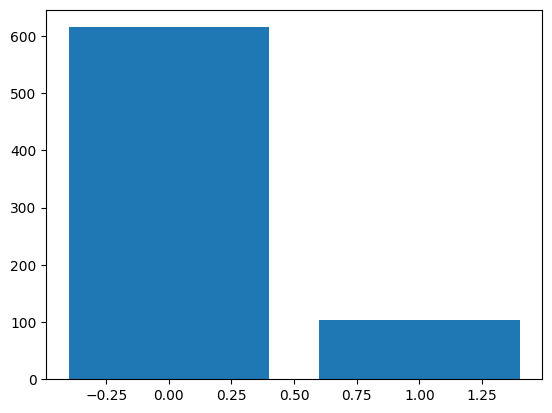

In [24]:
# another way
df_duplicates = df.duplicated()
df_duplicates_count=df_duplicates.value_counts()
plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.show()

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(615, 14)

# 3. Transformation of the Data:

## 3.1. Normalizion of the Data:

> #### To bring data at one scale:

### 3.1.1. Min-Max normalization/scaling

In [45]:
# data transformation
from sklearn.preprocessing import MinMaxScaler

# data
df

# select columns to normalize
cols_to_normalize = ['age','fare']

# create the scalar function/tool
scaler = MinMaxScaler()

# fit and transform the data on scaler
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# check the data 
df

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True,0


In [29]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [30]:
df.shape

(615, 14)

## 3.1.2. Standard Scaler:

In [31]:
# data transformation
from sklearn.preprocessing import StandardScaler

# data
df

# select columns to normalize
cols_to_normalize = ['age','fare']

# create the scalar function/tool
scaler = StandardScaler()

# fit and transform the data on scaler
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# check the data 
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.995147,0,5,0.794372,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.878384,0,0,0.858832,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123872,1,2,0.376301,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.222648,0,0,0.858832,C,First,man,True,Cherbourg,yes,True


In [32]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,6.150000e+02,615.000000,615.000000,6.150000e+02
mean,0.360976,2.469919,3.061688e-16,0.460163,0.365854,-1.213122e-16
std,0.480674,0.741063,1.000814e+00,0.894039,0.835572,1.000814e+00
min,0.000000,1.000000,-2.377209e+00,0.000000,0.000000,-1.351236e+00
25%,0.000000,2.000000,-5.973545e-01,0.000000,0.000000,-7.695610e-01
50%,0.000000,3.000000,1.238725e-01,0.000000,0.000000,-3.935399e-01
75%,1.000000,3.000000,5.267644e-01,1.000000,0.000000,5.641565e-01
max,1.000000,3.000000,2.400296e+00,5.000000,6.000000,3.170505e+00


## 3.1.3. Log transformation:

In [33]:
# log transformation
kashti =sns.load_dataset('titanic')
kashti.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [34]:
import numpy as np
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# log transform
kashti['age'] = np.log(kashti['age'])
kashti['fare'] = np.log(kashti['fare'])
kashti.head()


c:\Users\JMC\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

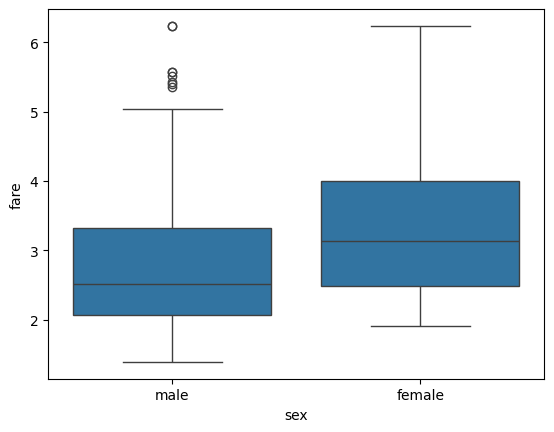

In [35]:
sns.boxplot(data=kashti, x='sex', y='fare')

<Axes: xlabel='age', ylabel='Count'>

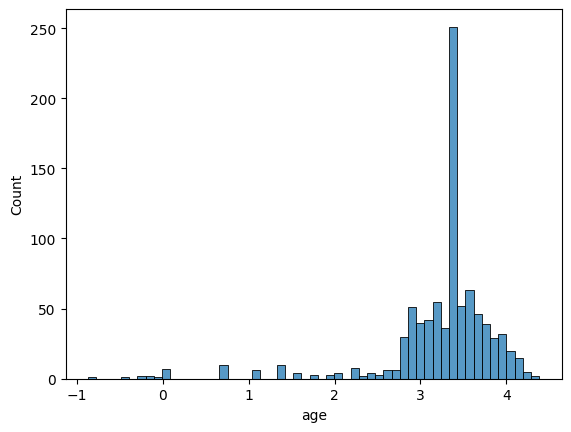

In [36]:
sns.histplot(kashti['age'])

# 4. Organization of the Data:

In [37]:
df['family_size'] = df['sibsp'] + df['parch']

c:\Users\JMC\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\JMC\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='family_size'>

c:\Users\JMC\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\JMC\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


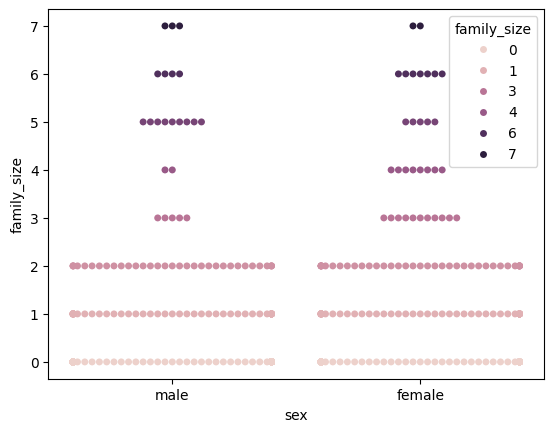

In [38]:
sns.swarmplot(data=df, x="sex", y="family_size", hue="family_size")

In [39]:
df = df.rename(columns={'survived': 'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [46]:
table = pd.pivot_table(df, values='fare', index='pclass',
    columns = "survival", aggfunc=np.sum)
table

C:\Users\JMC\AppData\Local\Temp\ipykernel_9672\1885198040.py:1: FutureWarning: The provided callable <function sum at 0x0000023CDAA28860> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(df, values='fare', index='pclass',


survival,0,1
pclass,,
1,22.070517,35.036780
2,20.685278,24.594516
3,60.609425,20.784525


<Axes: xlabel='fare', ylabel='age'>

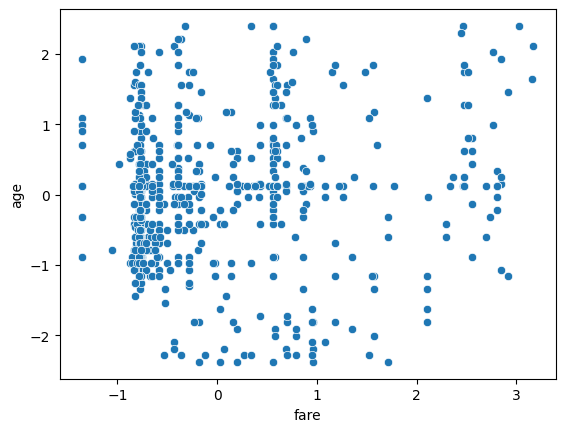

In [41]:
sns.scatterplot(data=df, x='fare', y='age')

In [42]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False,1
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True,0


# 5. Saving the wrangled data

In [43]:
df.to_csv("preprocess_data.csv")